In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

matplotlib.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams['font.size'] = 20

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)


In [5]:
def outliers_col(df):
    print('Number of ouliers with z_core>3 :')
    outliers_list=list()
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))
            if n_outliers>0:
                outliers_list.append(columna) 
    print('Columns with outliers: ')
    return outliers_list

def missing_values(df):
    print('Number of missing values for feature:')
    print('From {} values'.format(len(df)))
    drop_features=list()
    cont=0
    for col in df:
        nu_mv=len(df)-df[col].notnull().sum()
        if nu_mv>=1:
            per_missing=(nu_mv*100)/len(df)
            print('{}:  {} missing values {:.2f}% of feature data'.format( col,nu_mv,per_missing))
            if per_missing>40.0:
                drop_features.append(col)
            cont +=nu_mv
    if cont==0:
            print('...No missing values')
    
    for col in drop_features:
        df=df.drop([col],axis=1)
        print('\nDrop column {} with missing values > 40%'.format(col))
    return df

def important_features(df,y_all):
    from sklearn.feature_selection import RFE
    clf = RandomForestClassifier(random_state=42)
    selector = RFE(clf, 1, step=1)
    selector = selector.fit(df, y_all)
    pos=selector.ranking_
    return pos

def select_features(no_feat,df,y):
    pos=important_features(df,y)
    no_features=no_feat
    df_pos=pd.DataFrame({'Columna':df.columns,'Pos':pos})
    for n in range(1,df.shape[1]+1):  
        no_feat=n
        i=1
        new_data=[]
        while i<=no_features:
            for j in range(len(df_pos)):
                if df_pos.values[j,1]==i:
                    agrega=df_pos.values[j,0]
                    new_data.append(agrega)
                    break
            i=i+1
    print('Set of selected features : ',new_data)
    return sorted(new_data)

def model_selection(df,y):
    clf = RandomForestClassifier(random_state=42)
    model=cross_val_score(clf,df,y,cv=10)
    return model

def results_all_datas(df,y):
    results=[]
    for no_features in range(1,df.shape[1]+1):
        cols=select_features(no_features,df,y)
        df_new=df[cols]
        r=model_selection(df_new,y)
        results.append(r.mean())
    return results

In [6]:
print('---------- Las Vegas Strip Data Set  ----------')
print('\n')
print('Abstract: This dataset includes quantitative and categorical features from online reviews from 21 hotels located in Las Vegas Strip, extracted from TripAdvisor ')
print('The dataset contains 504 records and 20 tuned features, 24 per hotel (two per each month, randomly selected), regarding the year of 2015.')

print('Download data: https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip ')

print('\n')
print('Reading data to training...')    
df=pd.read_csv('data/data.csv', sep=';') 
       
print('\n')
print('Data: ')
print(df.head())

---------- Las Vegas Strip Data Set  ----------


Abstract: This dataset includes quantitative and categorical features from online reviews from 21 hotels located in Las Vegas Strip, extracted from TripAdvisor 
The dataset contains 504 records and 20 tuned features, 24 per hotel (two per each month, randomly selected), regarding the year of 2015.
Download data: https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip 


Reading data to training...


Data: 
  User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0          USA           11                  4             13      5   
1          USA          119                 21             75      3   
2          USA           36                  9             25      5   
3           UK           14                  7             14      4   
4       Canada            5                  5              2      4   

  Period of stay Traveler type Pool  Gym Tennis court Spa Casino  \
0        Dec-Feb       Friends   NO  YE

In [7]:
print('\n')
print('Size of data: ')
print(df.shape)



Size of data: 
(504, 20)


In [8]:
y=df['Score']
df=df.drop('Score', axis=1)
#%%
df.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [9]:
print('\n')
print('Missing valu?? ')
df=missing_values(df)



Missing valu?? 
Number of missing values for feature:
From 504 values
...No missing values


In [10]:
print('\n')
print('Drop rows duplicated!! ')
df = df.drop_duplicates()



Drop rows duplicated!! 


In [11]:
print('\n')
print('Drop columns duplicated!! ')
df=df.T.drop_duplicates().T



Drop columns duplicated!! 


In [12]:
print('\n')
print('Selecting numeric by data_type..')
numeric_columns = df.select_dtypes([np.number]).columns
categorical_columns = df.select_dtypes([object]).columns



Selecting numeric by data_type..


In [13]:
print('\n')
print('Encoder data..')
encoder=preprocessing.LabelEncoder()
for col in df:
    if df[col].dtype == np.object:
        df[col]=encoder.fit_transform(df[col] )



Encoder data..


In [14]:
print('\n')
print('Data Description')
print(df.describe(include='all'))



Data Description
       User country  Nr. reviews  Nr. hotel reviews  Helpful votes  \
count    504.000000   504.000000         504.000000     504.000000   
mean      31.688492    36.398810          13.057540      25.287698   
std       18.500233    35.014988          13.607048      24.896257   
min        0.000000     0.000000           0.000000       0.000000   
25%       12.000000    11.000000           4.000000       8.000000   
50%       45.000000    22.500000           8.000000      16.000000   
75%       46.000000    52.250000          17.000000      35.000000   
max       47.000000   138.000000          63.000000     108.000000   

       Period of stay  Traveler type        Pool         Gym  Tennis court  \
count      504.000000     504.000000  504.000000  504.000000    504.000000   
mean         1.507937       1.539683    0.952381    0.952381      0.238095   
std          1.115558       1.074932    0.213170    0.213170      0.426341   
min          0.000000       0.000000  

In [15]:
print('\n')
print('Tabla of correlations: ')
corr=df.corr()
print(corr)



Tabla of correlations: 
                   User country  Nr. reviews  Nr. hotel reviews  \
User country           1.000000     0.089311           0.026212   
Nr. reviews            0.089311     1.000000           0.808019   
Nr. hotel reviews      0.026212     0.808019           1.000000   
Helpful votes          0.040959     0.802794           0.810797   
Period of stay        -0.100979    -0.054464          -0.058640   
Traveler type         -0.013523    -0.088974          -0.055001   
Pool                  -0.009314     0.069936           0.102385   
Gym                   -0.042081    -0.067767          -0.057997   
Tennis court          -0.077789    -0.061241          -0.032866   
Spa                    0.016792    -0.115215          -0.078853   
Casino                 0.026349    -0.047700          -0.011058   
Free internet          0.002281    -0.015296          -0.010705   
Hotel name            -0.056042    -0.005648           0.012221   
Hotel stars            0.094966    -

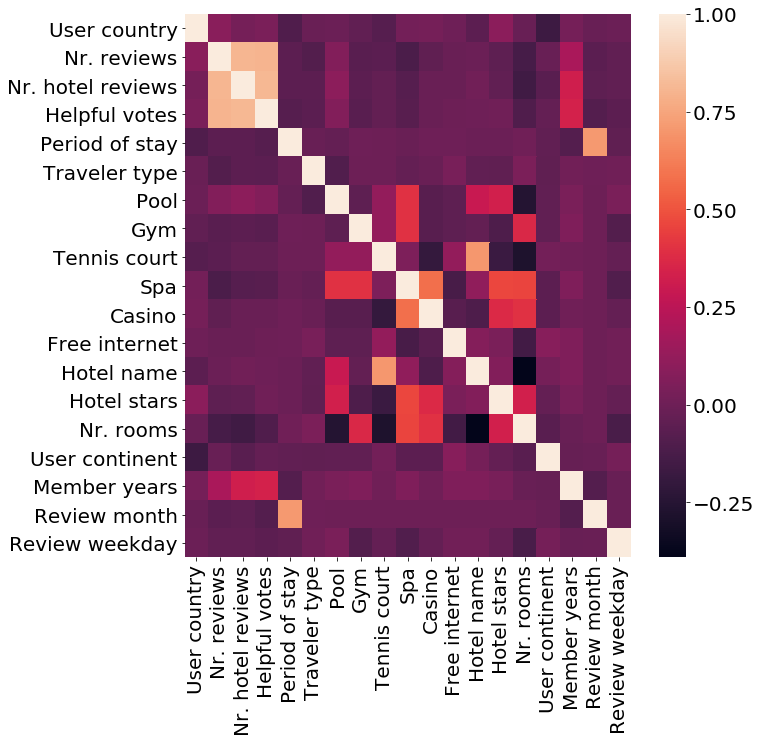

In [16]:
#print('\n')
#print('Heatmap: ')
sns.heatmap(corr)

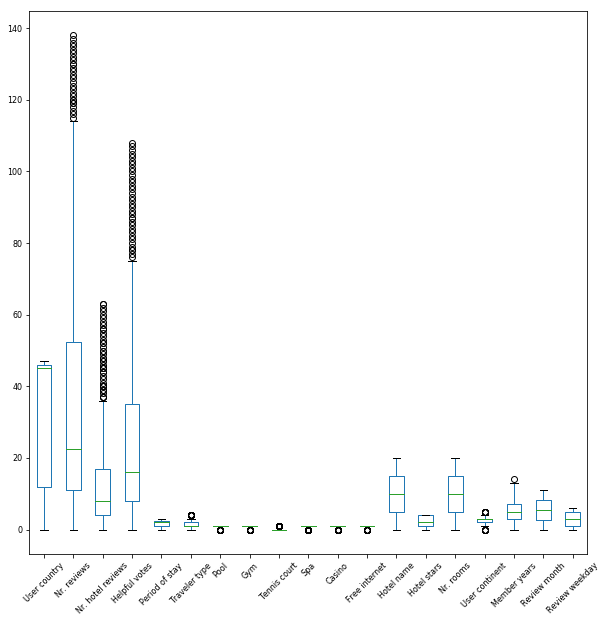

In [17]:
#print('\n')
#print('Boxplot: ')
df_boxplot=df.boxplot(grid=False, rot=45, fontsize=8)

In [18]:
print('\n')
print('Outliers: ')
print(outliers_col(df))



Outliers: 
Number of ouliers with z_core>3 :
User country | 0 | int32
Nr. reviews | 0 | int32
Nr. hotel reviews | 13 | int32
Helpful votes | 9 | int32
Period of stay | 0 | int32
Traveler type | 0 | int32
Pool | 24 | int32
Gym | 24 | int32
Tennis court | 0 | int32
Spa | 0 | int32
Casino | 48 | int32
Free internet | 24 | int32
Hotel name | 0 | int32
Hotel stars | 0 | int32
Nr. rooms | 0 | int32
User continent | 7 | int32
Member years | 0 | int32
Review month | 0 | int32
Review weekday | 0 | int32
Columns with outliers: 
['Nr. hotel reviews', 'Helpful votes', 'Pool', 'Gym', 'Casino', 'Free internet', 'User continent']


In [19]:
list_outliers=outliers_col(df)
#%%
print('\n')
print('Data description of features with outliers ')
for col in list_outliers:
    print('\n')
    print(df[col].describe())

Number of ouliers with z_core>3 :
User country | 0 | int32
Nr. reviews | 0 | int32
Nr. hotel reviews | 13 | int32
Helpful votes | 9 | int32
Period of stay | 0 | int32
Traveler type | 0 | int32
Pool | 24 | int32
Gym | 24 | int32
Tennis court | 0 | int32
Spa | 0 | int32
Casino | 48 | int32
Free internet | 24 | int32
Hotel name | 0 | int32
Hotel stars | 0 | int32
Nr. rooms | 0 | int32
User continent | 7 | int32
Member years | 0 | int32
Review month | 0 | int32
Review weekday | 0 | int32
Columns with outliers: 


Data description of features with outliers 


count    504.000000
mean      13.057540
std       13.607048
min        0.000000
25%        4.000000
50%        8.000000
75%       17.000000
max       63.000000
Name: Nr. hotel reviews, dtype: float64


count    504.000000
mean      25.287698
std       24.896257
min        0.000000
25%        8.000000
50%       16.000000
75%       35.000000
max      108.000000
Name: Helpful votes, dtype: float64


count    504.000000
mean       0.952381

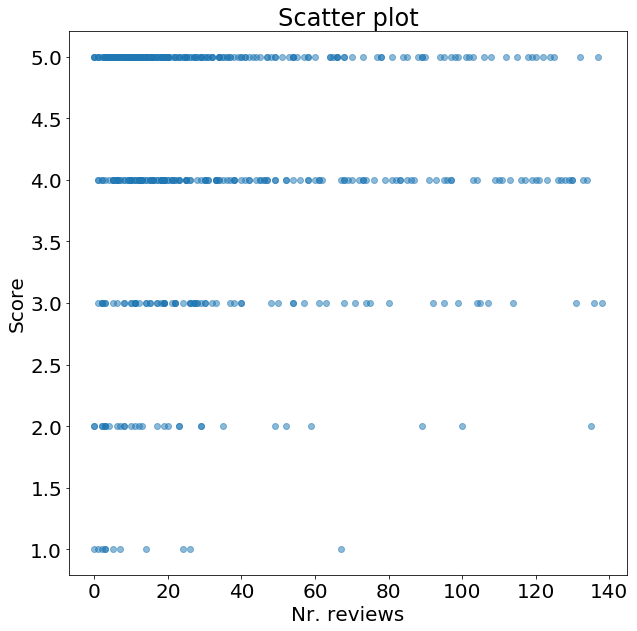

In [20]:
plt.scatter(df['Nr. reviews'], y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Nr. reviews')
plt.ylabel('Score')
plt.show()

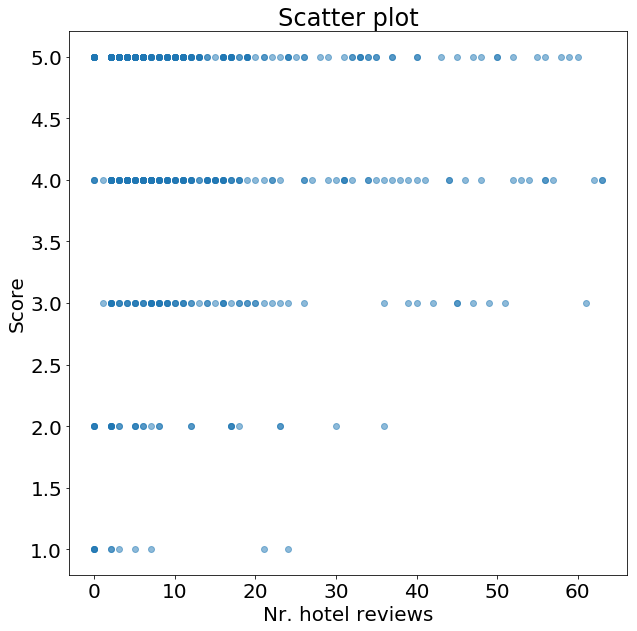

In [21]:
plt.scatter(df['Nr. hotel reviews'], y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Nr. hotel reviews')
plt.ylabel('Score')
plt.show()

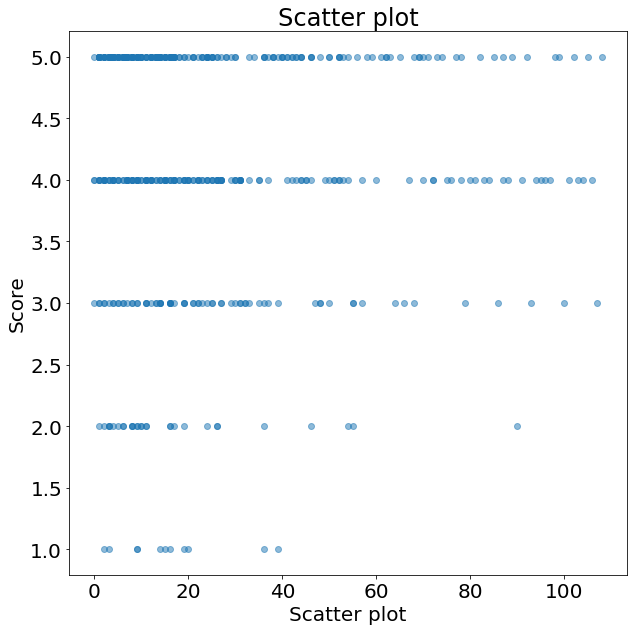

In [22]:
plt.scatter(df['Helpful votes'], y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Scatter plot')
plt.ylabel('Score')
plt.show()

In [23]:
print('\n')
print('Preprocessing data.. ')
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(data=df_scaled, columns=df.columns)



Preprocessing data.. 


In [24]:
print('\n')
print('Feature Selection with RFECV ')
estimator = DecisionTreeClassifier(random_state=42)
selector = RFECV(estimator, step=10, cv=100)
selector = selector.fit(df_scaled,y)



Feature Selection with RFECV 


In [25]:
df_new=selector.transform(df_scaled)

In [26]:
no_features=df_new.shape[1]

print('\n')
print('Training the model using GridSearchCV with differents PCA() dimensions ')

list_rmse=list()
for no_feat in range(1,no_features+1):

    svd = PCA(n_components=no_feat)
    df_truncated=svd.fit_transform(df_new)   
  
    X_train, X_test, y_train, y_test = train_test_split(df_truncated, y, test_size=0.3, random_state=42)
    
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svc = SVC(gamma="scale")
    clf = GridSearchCV(svc, parameters, cv=int(np.round(X_train.shape[0]/10)))
    clf.fit(X_train, y_train)

    predictions=clf.predict(X_test)

    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test, predictions)
    list_rmse.append(np.sqrt(mse))



Training the model using GridSearchCV with differents PCA() dimensions 


In [27]:
range_=range(1,no_features+1)

print('\n')
print('Results:')
r=pd.DataFrame(np.linspace(1, no_features, no_features,dtype=int),columns=['No_features'])
r['RMSE error']=list_rmse
print(r)



Results:
    No_features  RMSE error
0             1    1.335251
1             2    1.332785
2             3    1.287593
3             4    1.285035
4             5    1.285035
5             6    1.277333
6             7    1.227428
7             8    1.180990
8             9    1.197585
9            10    1.186547
10           11    1.194835
11           12    1.200329
12           13    1.194835
13           14    1.194835
14           15    1.213954
15           16    1.169795
16           17    1.175406
17           18    1.213954
18           19    1.211241


In [28]:
comparison_results=pd.DataFrame(y_test)
comparison_results['predictions']=predictions

comparison_results.to_csv ('results.csv', index = None, header=True)

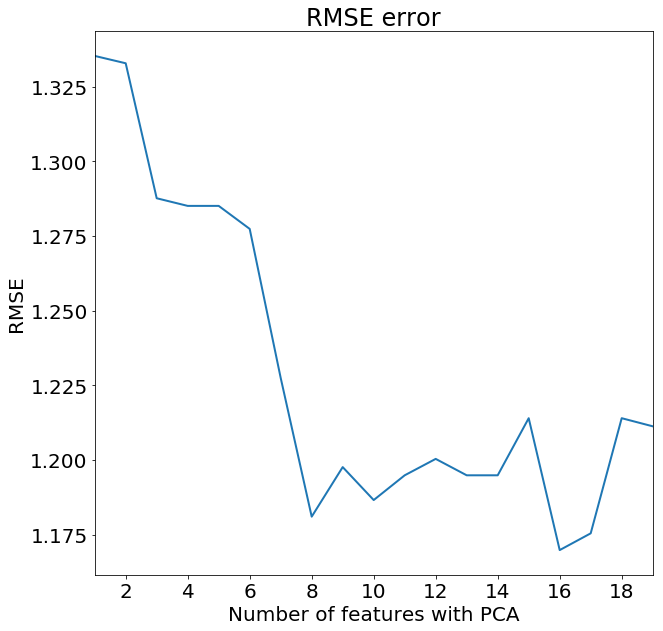

In [29]:
line=plt.plot(range_,list_rmse,linewidth=2)
plt.title('RMSE error')
plt.xlabel('Number of features with PCA')
plt.ylabel('RMSE')
plt.xlim([1,no_features])
plt.show()
